In [1]:
import pandas as pd
import numpy as np

### 실제 관측 데이터

In [2]:
# 데이터 불러오기
Climate_Change_Impacts = pd.read_csv("Climate Change Impacts.csv")
Climate_Change_Impacts['Date'] = pd.to_datetime(Climate_Change_Impacts['Date'])

# World 데이터만
World_index = Climate_Change_Impacts.loc[:,'Entity'] == 'World'
LOWER_2020_index = Climate_Change_Impacts.loc[:,'Date'] <= '2020'
UPPER_1880_index = Climate_Change_Impacts.loc[:,'Date'] >= '1979'

# 데이터 셋에 Monthly averaged 열이 2개 있음, 2번째 탄소 배출 월간 평균 데이터임
tmp_CO2_real = Climate_Change_Impacts.loc[World_index&UPPER_1880_index&LOWER_2020_index, ['Date', 'Monthly averaged.2']]
tmp_CO2_real.rename(columns={'Date':'ds', 'Monthly averaged.2':'CO2_emission'}, inplace=True)

# 새로운 datetime Index
year = list(map(str,tmp_CO2_real['ds'].dt.year.to_list()))
month = list(map(str,tmp_CO2_real['ds'].dt.month.to_list()))
dash = ['-' for i in range(len(year))]
day = ['-01' for i in range(len(year))]
new_ds = [y+dash+m+day for y,dash,m,day in zip(year, dash, month, day)]
tmp_CO2_real['ds'] = pd.to_datetime(new_ds)
tmp_CO2_real.set_index('ds', inplace=True, drop=True)
display(tmp_CO2_real)

,CO2_emission
ds,
1979-01-01,336.56
1979-02-01,337.29
1979-03-01,337.88
1979-04-01,338.32
1979-05-01,338.26
...,...
2019-08-01,407.64
2019-09-01,407.92
2019-10-01,409.44


### 시나리오 데이터

In [3]:
# 데이터 불러오기
ipcc_scenario = pd.read_csv("ipcc-scenarios.csv")

# 시나리오 및 2020 이상 데이터만
SSP_index = ipcc_scenario.loc[:,"Scenario"] == "SSP3 - Baseline"
UPPER_2020_index = ipcc_scenario.loc[:,"Year"] >= 2020

tmp_CO2_scenario = ipcc_scenario.loc[SSP_index & UPPER_2020_index, ['Year','CO2 concentration']]
tmp_CO2_scenario.rename(columns={'Year':'ds', 'CO2 concentration':'CO2_emission'}, inplace=True)
tmp_CO2_scenario['ds'] = [str(i) + '-01'+'-01' for i in tmp_CO2_scenario['ds'].to_list()]

latest_CO2_emission_index = 0
for y in range(2020,2100):
    
    for m in range(1,13):
        if y%10 == 0 and m == 1:
            continue
        year = str(y)
        month = str(m)
        day = '01'
        
        new_date = year+'-'+month+'-'+day
        if m < 10:
            new_date = year+'-'+'0'+month+'-'+day
        
        new_row = {'ds': [new_date], 'CO2_emission' : [np.NaN]}
        tmp_CO2_scenario = pd.concat([tmp_CO2_scenario, pd.DataFrame(new_row)], axis=0)
    
    if y%10 == 0:
        latest_CO2_emission_index += 1

tmp_CO2_scenario['ds'] = pd.to_datetime(tmp_CO2_scenario['ds'])
tmp_CO2_scenario.sort_values('ds', inplace=True)
tmp_CO2_scenario.set_index('ds', inplace=True, drop=True)
tmp_CO2_scenario.interpolate(method='time', inplace=True)
tmp_CO2_scenario

,CO2_emission
ds,
2020-01-01,417.888760
2020-02-01,418.178211
2020-03-01,418.448987
2020-04-01,418.738438
2020-05-01,419.018552
...,...
2099-09-01,831.890870
2099-10-01,832.493408
2099-11-01,833.116030


,CO2_emission
ds,
1979-01-01,336.560000
1979-02-01,337.290000
1979-03-01,337.880000
1979-04-01,338.320000
1979-05-01,338.260000
...,...
2099-09-01,831.890870
2099-10-01,832.493408
2099-11-01,833.116030


<Axes: xlabel='ds'>

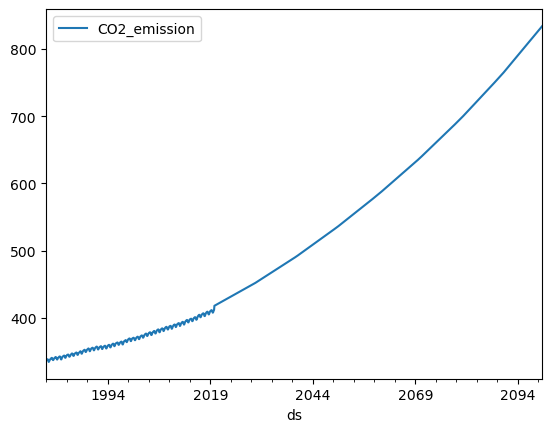

In [5]:
total = pd.concat([tmp_CO2_real,tmp_CO2_scenario], axis=0)
total.to_csv('SSP3_CO2_data.csv')

display(total)
total.plot()